In [7]:
import eradiate
eradiate.set_mode("mono")

from eradiate.solvers.rami.app import RamiScene
from eradiate.kernel.core.xml import load_dict
from eradiate.scenes.measure import DistantMeasure, PerspectiveCameraMeasure
from eradiate.util.units import ureg

scene = RamiScene(
    canopy={
        "type": "homogeneous_discrete_canopy", 
        #"size": [20, 20, 10],
        #"avoid_overlap": False,
    },
    surface={"type": "lambertian", "width": 30},
    measures=[
        DistantMeasure(id="measure_distant"), 
        PerspectiveCameraMeasure(
            id="measure_camera", 
            azimuth=45.,
            zenith=50.,
            distance=50.,
        )
    ]
)
print(scene)
kernel_dict = scene.kernel_dict()

RamiScene(id=None, surface=LambertianSurface(id='surface', width=<Quantity(16, 'meter')>, reflectance=UniformSpectrum(id=None, quantity=<PhysicalQuantity.REFLECTANCE: 9>, value=<Quantity(0.5, 'dimensionless')>)), canopy=HomogeneousDiscreteCanopy(id='homogeneous_discrete_canopy', n_leaves=3911, seed=1, avoid_overlap=True, leaf_area_index=3.0, mu=1.066, nu=1.853, hvr=1.0, hdo=<Quantity(0.993878505, 'meter')>, leaf_radius=<Quantity(0.25, 'meter')>, position=<Quantity([0 0 0], 'meter')>, size=<Quantity([16 16 15], 'meter')>, leaf_reflectance=UniformSpectrum(id=None, quantity=<PhysicalQuantity.REFLECTANCE: 9>, value=<Quantity(0.5, 'dimensionless')>), leaf_transmittance=UniformSpectrum(id=None, quantity=<PhysicalQuantity.TRANSMITTANCE: 12>, value=<Quantity(0.5, 'dimensionless')>)), illumination=DirectionalIllumination(id='illumination', zenith=<Quantity(0.0, 'degree')>, azimuth=<Quantity(0.0, 'degree')>, irradiance=SolarIrradianceSpectrum(id=None, dataset='thuillier_2003', scale=1.0)), measu

In [8]:
display(scene.measure_registry.all())

[{'measure_id': 'measure_distant',
  'sensor_id': 'measure_distant',
  'sensor_spp': 32},
 {'measure_id': 'measure_camera',
  'sensor_id': 'measure_camera',
  'sensor_spp': 32}]

In [9]:
from eradiate.kernel.core import ScalarTransform4f

kernel_dict["measure_camera"] = {
    "type": "perspective",
    "far_clip": 1e7,
    "to_world": ScalarTransform4f.look_at(
        origin=[40, 40, 20],
        target=[0, 0, 2.5],
        up=[0, 0, 1]
    ),
    "sampler": {
        "type": "independent",
        "sample_count": 32
    },
    "film": {
        "type": "hdrfilm",
        "width": 640,
        "height": 480,
        "pixel_format": "luminance",
        "component_format": "float32",
        "rfilter": {"type": "box"}
    }
}
display(kernel_dict["measure_camera"])
kernel_scene = load_dict(kernel_dict)

{'type': 'perspective',
 'far_clip': 10000000.0,
 'to_world': [[0.707107, -0.208978, -0.67552, 40],
  [-0.707107, -0.208978, -0.67552, 40],
  [0, 0.95533, -0.29554, 20],
  [0, 0, 0, 1]],
 'sampler': {'type': 'independent', 'sample_count': 32},
 'film': {'type': 'hdrfilm',
  'width': 640,
  'height': 480,
  'pixel_format': 'luminance',
  'component_format': 'float32',
  'rfilter': {'type': 'box'}}}

In [10]:
sensor = kernel_scene.sensors()[0]
kernel_scene.integrator().render(kernel_scene, sensor)

True

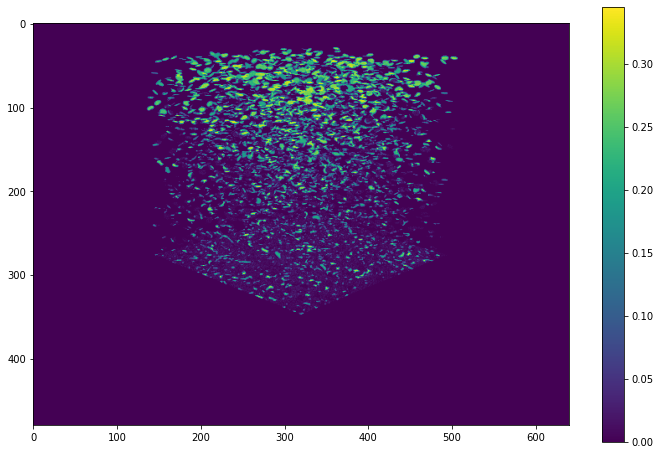

In [11]:
import matplotlib.pyplot as plt
import numpy as np

img = np.array(sensor.film().bitmap())
plt.figure(figsize=(12,8))
plt.imshow(img)
plt.colorbar()
plt.show()
plt.close()

In [12]:
s = load_dict({"type": "scene", "camera": {"type": "perspective", "id": "camera"}})
s.sensors()[0].id()

2021-01-10 18:11:38 WARN main [HDRFilm] Monochrome mode enabled, setting film output pixel format to 'luminance' (was rgba).

2021-01-10 18:11:38 WARN main [Scene] No integrator found! Instantiating a path tracer..

2021-01-10 18:11:38 WARN main [TShapeKDTree] kd-tree contains no geometry!

'camera'

# RAMI scene setup

In [1]:
# Initialise Eradiate
import eradiate
eradiate.set_mode("mono")

In [31]:
# Load scene
from eradiate.solvers.rami.app import RamiScene, RamiSolverApp

app = RamiSolverApp(scene=RamiScene(
    illumination={
        "type": "directional",
        "zenith": 30.,
        "azimuth": 45.
    },
    canopy={"type": "homogeneous_discrete_canopy"},
    measures={
        "type": "distant",
        "id": "toa_brf",
        "film_resolution": (64, 64),
        "spp": 1000,
        #"orientation": 45.,
        #"flip_directions": False,
    }
))

In [32]:
# Check scene
display(app.scene.surface)
display(app.scene.canopy)
display(app.scene.measures)

LambertianSurface(id='surface', width=<Quantity(16, 'meter')>, reflectance=UniformSpectrum(id=None, quantity=<PhysicalQuantity.REFLECTANCE: 9>, value=<Quantity(0.5, 'dimensionless')>))

HomogeneousDiscreteCanopy(id='homogeneous_discrete_canopy', n_leaves=3911, seed=1, avoid_overlap=True, leaf_area_index=3.0, mu=1.066, nu=1.853, hvr=1.0, hdo=<Quantity(0.993878505, 'meter')>, leaf_radius=<Quantity(0.25, 'meter')>, position=<Quantity([0 0 0], 'meter')>, size=<Quantity([16 16 15], 'meter')>, leaf_reflectance=UniformSpectrum(id=None, quantity=<PhysicalQuantity.REFLECTANCE: 9>, value=<Quantity(0.5, 'dimensionless')>), leaf_transmittance=UniformSpectrum(id=None, quantity=<PhysicalQuantity.TRANSMITTANCE: 12>, value=<Quantity(0.5, 'dimensionless')>))

[DistantMeasure(id='toa_brf', direction=array([0, 0, 1]), flip_directions=None, target=TargetRectangle(xmin=<Quantity(-8.0, 'meter')>, xmax=<Quantity(8.0, 'meter')>, ymin=<Quantity(-8.0, 'meter')>, ymax=<Quantity(8.0, 'meter')>), orientation=<Quantity(0.0, 'degree')>, spp=1000, film_resolution=(64, 64))]

In [33]:
# Run computation
app.run()

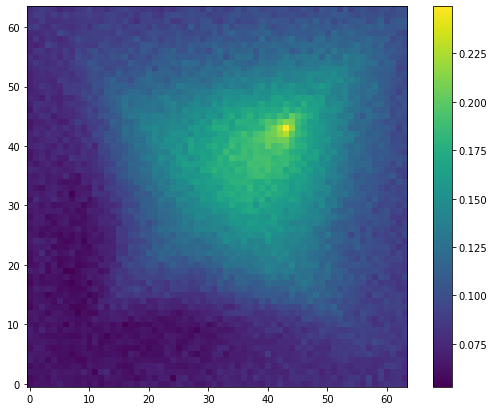

In [34]:
# Visualise results
import matplotlib.pyplot as plt
import numpy as np

data = app.results["toa_brf"]

if data.ndim == 1:
    plt.figure(figsize=(9, 6))
    x = np.linspace(-90., 90., len(data))
    plt.plot(x, data)
    plt.show()
    plt.close()    

else:
    plt.figure(figsize=(9, 7))
    plt.imshow(data, origin="lower")
    plt.colorbar()
    plt.show()
    plt.close()

<xarray.Dataset>
Dimensions:  (x: 64, y: 64)
Coordinates:
    vza      (y, x) float64 88.22 88.22 88.22 88.22 ... 88.22 88.22 88.22 88.22
    vaa      (y, x) float64 -135.0 -133.6 -132.1 -130.7 ... 47.86 46.43 45.0
Dimensions without coordinates: x, y
Data variables:
    lo       (y, x) float64 0.06117 0.06545 0.0647 ... 0.09488 0.1035 0.1011

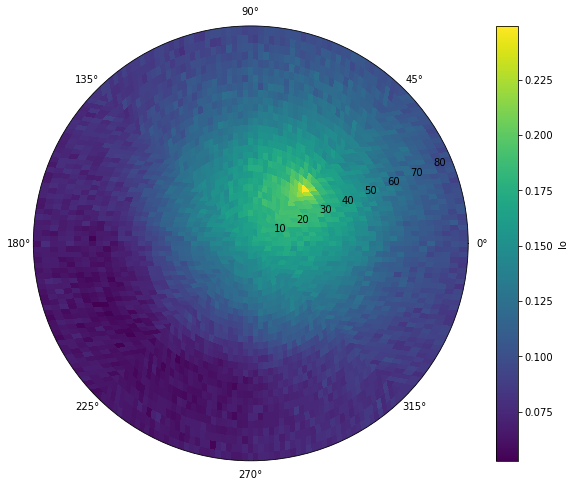

In [35]:
import xarray as xr

ds = xr.Dataset({"lo": (("y", "x"), data)})
da = ds.lo

import numpy as np
from eradiate.kernel.core.warp import square_to_uniform_hemisphere
from eradiate.kernel.core import Point2f
from eradiate.util.frame import direction_to_angles
import eradiate.util.plot as ertplt
from eradiate.util.units import ureg

theta = np.empty_like(da)
phi = np.empty_like(da)
xv, yv = np.meshgrid(da.x, da.y)

for i, (x, y) in enumerate(zip(xv.ravel(), yv.ravel())):
    xy = [float((x + 0.5) / da.shape[0]), float((y + 0.5) / da.shape[1])]
    d = square_to_uniform_hemisphere(xy)
    theta.ravel()[i], phi.ravel()[i] = direction_to_angles(d).to("deg").m

ds["vza"] = (("y", "x"), theta, {"units": "deg"})
ds["vaa"] = (("y", "x"), phi, {"units": "deg"})
ds = ds.set_coords(("vza", "vaa"))
    
display(ds)

plt.figure(figsize=(10, 8))
ds.lo.ert.plot_pcolormesh_polar(
    r="vza", 
    theta="vaa", 
    infer_intervals=False, 
)
#ds.vza.plot.contour()
#ds.vaa.plot.imshow()
ertplt.remove_xylabels()
#plt.ylim([0, 80])
#plt.xlim(ureg.Quantity([-180, 180], "deg"))

plt.show()
plt.close()